In [1]:
import pandas as pd
import datetime
import matplotlib
now = datetime.datetime.now()

In [2]:
df = pd.read_excel("data/" + str(now.year) + "-" + str(now.month) + ".xls", skiprows=5)
df = df.fillna(value=0)
df = df.replace("OK", 1)
df.columns = ["clown"] + [x for x in df.columns[1:]]
df = df[["clown"] + [x for x in df.select_dtypes('number').columns if df[x].sum() >= 2]]
df = df[df["clown"].apply(lambda x: x != "Count")]
df

,clown,PED AM.1,PED PM.4,PED AM.5,PED PM.11,PED PM.12,PED AM.17,PED PM.18,PED AM.23,PED PM.26
0,Valentina Bacchi,0,1,0,0,0,0,1,0,0
1,Luca Della Pasqua,0,0,1,0,0,0,0,0,0
2,Annalisa Cavini,0,0,1,0,0,0,0,0,0
3,Fabrizio,1,0,0,0,0,0,0,0,0
4,Manuela Fanti,1,0,0,0,0,1,0,1,0
5,Matteo F,0,1,0,0,0,0,0,0,0
6,Tamara,0,0,0,0,1,0,0,0,1
7,Alberto,0,0,0,1,0,0,0,0,0
8,Antonio,0,0,0,0,0,0,1,0,0
9,Gabriella - Blum,0,0,0,1,0,0,0,0,0


In [3]:
s = """
Ciao Nasi!

Allego il file con i turni.

Chi ha fatto almeno un turno deve (il prima possibile):
- Confermare la correttezza del file Excel rispondendo a questa e-mail
- Inviare il RIMBORSO KM ed eventuale RIMBORSO SCONTRINO

Un paio di statistiche:
- I clown attivi sono {attivi}
- I turni coperti sono {turni}

Grazie

PS. 
- Mantenete il doodle aggiornato (e.g., quando salta un turno)
- Modificate il doodle *senza* duplicare le vostre votazioni (e.g., quando cancellate/aggiungete turni)
"""

turni = len(df.columns) - 1
attivi = len(df[df.sum(axis=1) > 0].index)

print(s.format(attivi=attivi, turni= turni))


Ciao Nasi!

Allego il file con i turni.

Chi ha fatto almeno un turno deve (il prima possibile):
- Confermare la correttezza del file Excel rispondendo a questa e-mail
- Inviare il RIMBORSO KM ed eventuale RIMBORSO SCONTRINO

Un paio di statistiche:
- I clown attivi sono 12
- I turni coperti sono 9

Grazie

PS. 
- Mantenete il doodle aggiornato (e.g., quando salta un turno)
- Modificate il doodle *senza* duplicare le vostre votazioni (e.g., quando cancellate/aggiungete turni)



C:\Users\matte\AppData\Local\Temp/ipykernel_16108/815383056.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  attivi = len(df[df.sum(axis=1) > 0].index)


In [4]:
from os import listdir
from os.path import isfile, join

def transcode(x):
    if "Matteo F" in x:
        return "Matteo Francia"
    elif "Antonio" in x:
        return "Antonio Castagnola"
    elif "Gabriella" in x:
        return "Gabriella"
    elif "Silvia Pimpinella" in x:
        return "Silvia Severi"
    else:
        return x

mypath = "data/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.endswith(".xls")]
dff = pd.DataFrame()
for f in onlyfiles:
    df = pd.read_excel("data/" + f, skiprows=5)
    df = df.fillna(value=0)
    df = df.replace("OK", 1)
    df.columns = ["clown"] + [x for x in df.columns[1:]]
    df = df[df["clown"].apply(lambda x: x != "Count" and x != "Conta")]
    df = df[["clown"] + [x for x in df.select_dtypes('number').columns if df[x].sum() >= 2]]
    df["clown"] = df["clown"].apply(lambda x: transcode(x))
    df = df.melt(id_vars=["clown"])
    df["year"] = f.split("-")[0]
    df["month"] = f.split("-")[1].replace(".xls", "")
    df = df[df["value"].apply(lambda x: x > 0)]    
    dff = dff.append(df)
dff

,clown,variable,value,year,month
1,Fabrizio,9:00 AM – 12:00 PM.5,1,2021,08
5,Luca Della Pasqua,9:00 AM – 12:00 PM.5,1,2021,08
8,Fabrizio,9:00 AM – 12:00 PM.9,1,2021,08
11,Matteo Francia,9:00 AM – 12:00 PM.9,1,2021,08
15,Fabrizio,9:00 AM – 12:00 PM.10,1,2021,08
17,Manuela Fanti,9:00 AM – 12:00 PM.10,1,2021,08
23,Laura,9:00 AM – 12:00 PM.12,1,2021,08
26,Luca Della Pasqua,9:00 AM – 12:00 PM.12,1,2021,08
31,Manuela Fanti,9:00 AM – 12:00 PM.16,1,2021,08
34,Gabriella,9:00 AM – 12:00 PM.16,1,2021,08


Turni coperti by month

<AxesSubplot:xlabel='year,month'>

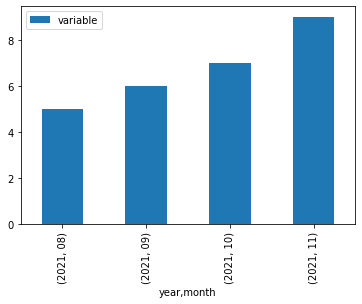

In [5]:
dff[["year", "month", "variable"]].groupby(by=["year", "month"]).nunique().plot(kind="bar")

Turni ogni mese by clown

<AxesSubplot:xlabel='clown,month,year'>

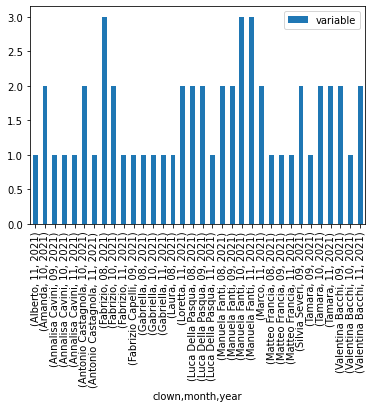

In [6]:
dff[["year", "month", "variable", "clown"]].groupby(by=["clown", "month", "year"]).count().plot(kind="bar")

Turni e mesi coperti da ogni clown

<AxesSubplot:xlabel='clown,year'>

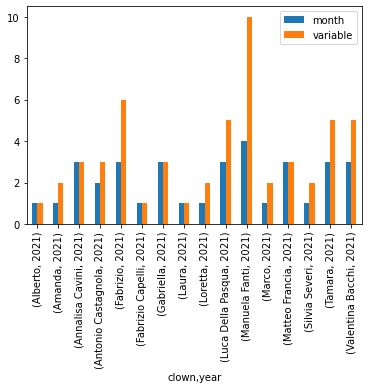

In [7]:
dff[["year", "month", "variable", "clown"]].groupby(by=["clown", "year"]).nunique().plot(kind="bar")

Clown attivi

In [8]:
dff["clown"].nunique()

16